In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
t0 = [0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720, 780, 840, 900, 960, 1020, 1080, 1140, 1200, 1260, 1320, 1380, 1440, 1500, 1560, 1620, 1680, 1740, 1800, 1860, 1920, 1980, 2040, 2100, 2160, 2220, 2280, 2340, 2400, 2460, 2520, 2580, 2640, 2700, 2760, 2820, 2880, 2940, 3000, 3060, 3120, 3180, 3240, 3300, 3360, 3420, 3480, 3540, 3600, 3660, 3720, 3780, 3840, 3900, 3960, 4020, 4080, 4140, 4200, 4260, 4320, 4380, 4440, 4500, 4560, 4620, 4680, 4740, 4800, 4860, 4920, 4980, 5040, 5100, 5160, 5220, 5280, 5340, 5400, 5460, 5520, 5580, 5640, 5700, 5760, 5820, 5880, 5940, 6000, 6060, 6120, 6180, 6240]
G0 = [37.4 , 37.0 , 36.6 , 36.2 , 36.0 , 35.5 , 35.1 , 34.8 , 34.4 , 34.1 , 33.8 , 33.5 , 33.3 , 32.8 , 32.6 , 32.2 , 31.9 , 31.6 , 31.5 , 31.1 , 30.8 , 30.6 , 30.3 , 30.0 , 29.9 , 29.6 , 29.3 , 29.0 , 28.8 , 28.6 , 28.4 , 28.2 , 28.0 , 27.8 , 27.5 , 27.4 , 27.2 , 27.1 , 26.9 , 26.8 , 26.6 , 26.4 , 26.3 , 26.2 , 26.1 , 25.9 , 25.8 , 25.7 , 25.5 , 25.4 , 25.3 , 25.2 , 25.1 , 25.0 , 24.9 , 24.8 , 24.7 , 24.6 , 24.5 , 24.5 , 24.4 , 24.3 , 24.2 , 24.1 , 24.0 , 24.0 , 23.9 , 23.8 , 23.8 , 23.7 , 23.7 , 23.6 , 23.5 , 23.5 , 23.4 , 23.4 , 23.4 , 23.3 , 23.2 , 23.2 , 23.2 , 23.0 , 23.0 , 22.9 , 22.9 , 22.8 , 22.8 , 22.7 , 22.6 , 22.6 , 22.6 , 22.6 , 22.5 , 22.5 , 22.5 , 22.4 , 22.3 , 22.3 , 22.2 , 22.2 , 22.2 , 22.0 , 22.0 , 22.0 , 22.0]
t0 = np.array(t0)
G0 = np.array(G0)

            6             5             4             3             2
-9.178e-24 x + 3.266e-19 x - 3.721e-15 x + 1.431e-11 x + 2.466e-08 x - 0.0003562 x + 1.135


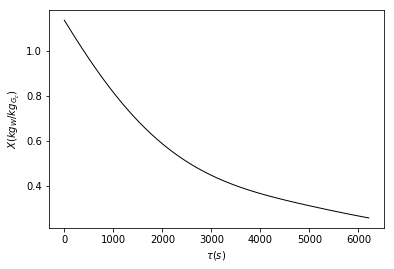

In [3]:
# 干燥曲线 X-t
P_Xt = np.polyfit(t0, (G0 - 17.5) / 17.5, 6)
f_Xt = np.poly1d(P_Xt)
t = np.arange(0, 6240, 30)
Xt = f_Xt(t)

print(f_Xt)
plt.xlabel('$\\tau (s)$')
plt.ylabel('$X (kg_W / kg_{G_c})$')
plt.plot(t, Xt, 'k', linewidth=1.0)

Text(1.3020742761742943, 0.3330424504087802, '(1.302,0.333)')

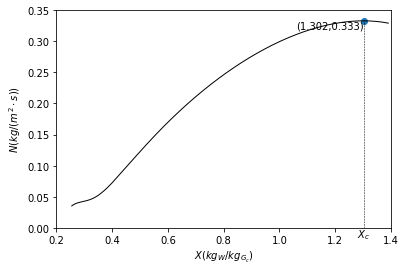

In [4]:
# 干燥速率曲线 N - X
Gc = 17.5
A = 0.019352 # A=2*(86*108+86*2+108*2) mm^2 = 19352 mm^2 = 0.019352 m^2
p = - Gc / A
f_Nt = f_Xt.deriv() * p

t = np.arange(0-700, 6240, 30)
Xc = f_Xt(t)[np.where(np.fabs(f_Nt.deriv()(t) * f_Xt.deriv()(t)) < 4.2e-10)[0]][0] # 外推得到导数为0的点，即为Xc
Nc = f_Nt(t)[f_Xt(t) == Xc][0]

plt.xlim(0.2,1.4)
plt.ylim(0,0.35)
plt.xlabel('$X (kg_W / kg_{G_c})$')
plt.ylabel('$N (kg / (m^2\\cdot s))$')
plt.plot(f_Xt(t), f_Nt(t), 'k', linewidth=1.0)
plt.scatter(Xc, Nc)
plt.plot([Xc, Xc], [0, Nc], color='k', linewidth=0.5, linestyle="--")
plt.text(Xc, 0, '$X_c$',ha='center', va='top', fontsize=10)
plt.text(Xc, Nc, '('+str(round(Xc,3))+','+str(round(Nc,4))+')', va='top', ha='right', fontsize=10)

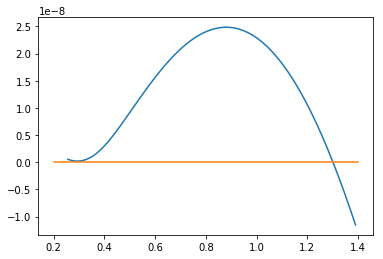

In [5]:
plt.plot(f_Xt(t), f_Nt.deriv()(t) * f_Xt.deriv()(t))
plt.plot([0.2, 1.4], [0,0])